# Titanic Survival Analysis: Ticket Class to Survival Exploration

## Project Overview

This notebook explores the Kaggle Titanic dataset to analyze survival patterns among passengers. The primary goal is to identify key features that influenced survival rates and build insights for predictive modeling.

**Dataset**: Titanic passenger data from Kaggle competition

**Specific Notebook Objective**: Exploratory Data Analysis (EDA) focusing on ticket-class-based survival patterns

---

## 1. Data Loading and Initial Exploration

First, let's load the training dataset and examine its structure.

In [34]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from src.constants import PCLASS_HEADER, SURVIVED_HEADER


titanic_training_df: DataFrame = pd.read_csv("../data/train.csv")
titanic_training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Initial Observations

The dataset contains 891 passengers with the following key features:
- **Survived**: Target variable (0 = No, 1 = Yes)
- **Pclass**: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex**: Gender of passenger (male or female)
- **Age**: Age in years (contains missing values)
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Fare**: Passenger fare
- **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

---

## 2. Data Quality Check for Pclass and Survival Features

Before analyzing the relationship between ticket class and survival, let's verify the quality and completeness of the relevant columns.

In [35]:
# Dataset overview
print(f"Dataset contains {titanic_training_df.shape[0]} passengers with {titanic_training_df.shape[1]} features\n")

# Check for missing values in analysis columns
print("Data quality check for Pclass and Survived:")
print(f"  Pclass - Missing: {titanic_training_df[PCLASS_HEADER].isna().sum()} ({titanic_training_df[PCLASS_HEADER].isna().sum()/len(titanic_training_df)*100:.1f}%)")
print(f"  Survived - Missing: {titanic_training_df[SURVIVED_HEADER].isna().sum()} ({titanic_training_df[SURVIVED_HEADER].isna().sum()/len(titanic_training_df)*100:.1f}%)")

# Verify data types
print(f"\nData types:")
print(f"  Pclass: {titanic_training_df[PCLASS_HEADER].dtype}")
print(f"  Survived: {titanic_training_df[SURVIVED_HEADER].dtype}")

Dataset contains 891 passengers with 12 features

Data quality check for Pclass and Survived:
  Pclass - Missing: 0 (0.0%)
  Survived - Missing: 0 (0.0%)

Data types:
  Pclass: int64
  Survived: int64


---

## 3. Visualization: Survival Rate by Ticket Class

Now let's visualize the survival rates across ticket classes to identify patterns. This bar chart shows the proportion of passengers who survived within each ticket class.

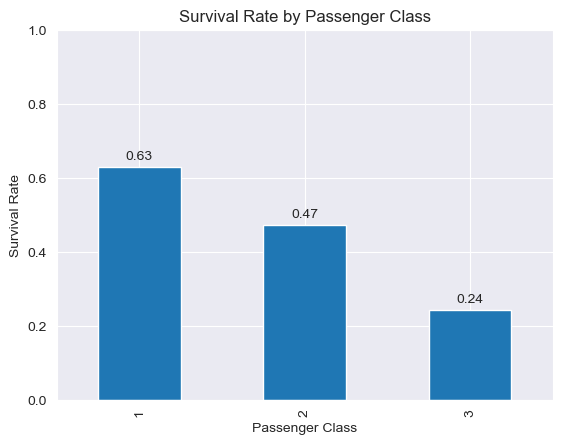

In [36]:
from matplotlib.container import BarContainer

pclass_survival_df: DataFrame = titanic_training_df[[SURVIVED_HEADER, PCLASS_HEADER]].copy()

survival_by_pclass_group = pclass_survival_df.groupby(PCLASS_HEADER, observed=True)[SURVIVED_HEADER].mean()
survival_by_pclass_bar_chart: Axes = survival_by_pclass_group.plot(kind="bar")

survival_by_pclass_bar_chart.set_xlabel("Passenger Class")

survival_by_pclass_bar_chart.set_ylabel("Survival Rate")
survival_by_pclass_bar_chart.set_ybound(0, 1)

survival_by_pclass_bar_chart.set_title("Survival Rate by Passenger Class")

for container in survival_by_pclass_bar_chart.containers:
    if isinstance(container, BarContainer):
        survival_by_pclass_bar_chart.bar_label(container, fmt='%.2f', padding=3)

plt.show()

### Key Insight: Ticket Class is a Strong Predictor of Survival

Passengers with first-class tickets had significantly higher survival rates than passengers with lower-class tickets.

**Passenger Distribution by Class:**
- 1st Class: 216 passengers (24.2%)
- 2nd Class: 184 passengers (20.7%)
- 3rd Class: 491 passengers (55.1%)

**Survival Rates by Class:**
- 1st Class: 63% survival rate (136 survived out of 216)
- 2nd Class: 47% survival rate (87 survived out of 184)
- 3rd Class: 24% survival rate (119 survived out of 491)

---

## 4. Alternative Visualizations

Let's explore different methods to visualize the relationship between ticket class and survival.

### Survival Count by Ticket Class

This stacked bar chart shows the absolute counts of survivors and non-survivors within each ticket class, providing insight into both survival rates and the distribution of passengers by class.

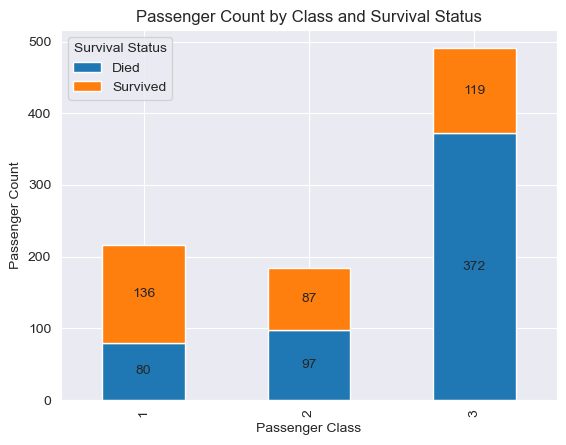

In [37]:
survival_rate_bar_chart: Axes = pclass_survival_df.groupby([PCLASS_HEADER, SURVIVED_HEADER], observed=True).size().unstack().plot(kind='bar', stacked=True)

survival_rate_bar_chart.set_xlabel("Passenger Class")
survival_rate_bar_chart.set_ylabel("Passenger Count")

survival_rate_bar_chart.set_title("Passenger Count by Class and Survival Status")

# Update legend labels for clarity
survival_rate_bar_chart.legend(["Died", "Survived"], title="Survival Status")

# Add value labels to stacked bars
for container in survival_rate_bar_chart.containers:
    if isinstance(container, BarContainer):
        survival_rate_bar_chart.bar_label(container, label_type='center', fmt='%d')

plt.show()

---

## 5. Summary and Next Steps

### Key Findings

1. **Ticket class is a strong predictor of survival**: First-class passengers had a 63% survival rate compared to only 24% for third-class passengers—a 2.6x difference. This makes ticket class an important feature for predictive modeling.

2. **Class distribution was heavily skewed toward third class**: Over half (55%) of all passengers were in third class. Despite being the largest group with 491 passengers, third class had the lowest survival count (119 survivors) and rate (24%).

3. **Linear relationship between class and survival**: The survival rates show a clear linear pattern, with each class tier showing progressively better survival outcomes (1st: 63%, 2nd: 47%, 3rd: 24%).

4. **Data quality is excellent**: Both the Pclass and Survived columns have zero missing values, making this a reliable feature for analysis without requiring imputation or data cleaning.

---

## Technical Notes

This analysis uses constants from `src/constants.py` (PCLASS_HEADER, SURVIVED_HEADER) to ensure consistency across the codebase. All visualizations use matplotlib for plotting and include proper axis labels, value annotations, and legends for clarity.